In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [60]:
job="digital_marketing_specialist"
df=pd.read_csv(f"../separated_jobs/{job}.csv")

In [61]:
df.head()

,company_name,job_role,job_location,salary_pa,skills,company_rating,standardized_job_role
0,General Mills,"D&T Analyst II – Marketing Technology, Sites &...",Mumbai,850000.0,"Cloud infrastructure, Software troubleshooting...",4.1,Digital Marketing Specialist
1,NKT,Market Intelligence Analyst,Chennai,0.0,"Microsoft Powerpoint, Search engines, Power BI...",4.3,Digital Marketing Specialist
2,ICF,Energy Markets Analyst,Bengaluru,850000.0,"Microsoft Excel, Data analysis skills, Researc...",3.6,Digital Marketing Specialist
3,GLOBALFOUNDRIES,Principal Analyst Bus Unit Market Intelligence...,Bengaluru,0.0,"Microsoft Powerpoint, Microsoft Office, Analys...",3.8,Digital Marketing Specialist
4,S&P Global,Power Market Analyst (South Asia),Mumbai,700000.0,"Power BI, Microsoft Excel, R, Microsoft Office...",4.1,Digital Marketing Specialist


In [62]:
df.isnull().sum()

company_name               0
job_role                   0
job_location               0
salary_pa                  0
skills                    13
company_rating           590
standardized_job_role      0
dtype: int64

In [63]:
df['salary_pa'] = df['salary_pa'].astype(float) / 100000
df.rename(columns = {'salary_pa':'salary_lpa'}, inplace = True)

In [64]:
df[df['salary_lpa'] == 0]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
1,NKT,Market Intelligence Analyst,Chennai,0.0,"Microsoft Powerpoint, Search engines, Power BI...",4.3,Digital Marketing Specialist
3,GLOBALFOUNDRIES,Principal Analyst Bus Unit Market Intelligence...,Bengaluru,0.0,"Microsoft Powerpoint, Microsoft Office, Analys...",3.8,Digital Marketing Specialist
5,Bain & Company Inc,"Analyst, Marketing Analytics",Delhi,0.0,"Microsoft Powerpoint, Power BI, Microsoft Exce...",4.3,Digital Marketing Specialist
6,Accenture,GN- Industry – MC- Capital Markets- Analyst,Pune,0.0,"Business intelligence, Sketch, Financial acume...",3.8,Digital Marketing Specialist
7,Feathersoft,Junior Market Research Analyst,India,0.0,"Microsoft Powerpoint, Microsoft Word, Microsof...",4.2,Digital Marketing Specialist
...,...,...,...,...,...,...,...
812,Crypto Mize,Marketing Developer,Delhi,0.0,"Web design, Adobe Photoshop, Bootstrap, IIS, I...",4.8,Digital Marketing Specialist
817,Knoxed Infotech PVT LTD,Walk-in Interview Drive | Sales & Marketing/E-...,India,0.0,"Microsoft Excel, Social media marketing, Sales...",NaN,Digital Marketing Specialist
821,Grevitywings Technologies,Digital Marketing Executive,Remote,0.0,NaN,NaN,Digital Marketing Specialist
822,Franklin Templeton Investments,Marketing Optimization Specialist,Hyderābād,0.0,"English, Project management, Time management",3.9,Digital Marketing Specialist


### Filling the null values by replacing with average salary of company rating

In [66]:
df['company_rating'] = df['company_rating'].fillna(0)
df["salary_lpa"]=df.salary_lpa.fillna(0)
avg_salary_by_rating = df[df['salary_lpa'] > 0].groupby('company_rating')['salary_lpa'].mean()


In [67]:
def map_with_nearest_rating(row, avg_salary_by_rating):
    if row['salary_lpa'] == 0:  # Check if salary is 0
        rating = row['company_rating']
        if rating in avg_salary_by_rating:  # If exact match exists
            return avg_salary_by_rating[rating]
        else:  # Find the closest rating
            nearest_rating = min(avg_salary_by_rating.keys(), key=lambda x: abs(x - rating))
            return avg_salary_by_rating[nearest_rating]
    return row['salary_lpa']  # If salary isn't 0, return the original value

# Apply the function to the DataFrame
df['salary_lpa'] = df.apply(lambda row: map_with_nearest_rating(row, avg_salary_by_rating), axis=1)


In [68]:
df

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,General Mills,"D&T Analyst II – Marketing Technology, Sites &...",Mumbai,8.500,"Cloud infrastructure, Software troubleshooting...",4.1,Digital Marketing Specialist
1,NKT,Market Intelligence Analyst,Chennai,16.575,"Microsoft Powerpoint, Search engines, Power BI...",4.3,Digital Marketing Specialist
2,ICF,Energy Markets Analyst,Bengaluru,8.500,"Microsoft Excel, Data analysis skills, Researc...",3.6,Digital Marketing Specialist
3,GLOBALFOUNDRIES,Principal Analyst Bus Unit Market Intelligence...,Bengaluru,11.400,"Microsoft Powerpoint, Microsoft Office, Analys...",3.8,Digital Marketing Specialist
4,S&P Global,Power Market Analyst (South Asia),Mumbai,7.000,"Power BI, Microsoft Excel, R, Microsoft Office...",4.1,Digital Marketing Specialist
...,...,...,...,...,...,...,...
826,Aayu Aesthetics,Digital Content Creator,Remote,1.500,"Web analytics, WordPress, Social media managem...",0.0,Digital Marketing Specialist
827,Manipal Hospitals,Content Marketing Specialist,Bengaluru,4.340,"Content marketing, Leadership",4.0,Digital Marketing Specialist
828,GNH India Pharmaceuticals Limited,Email Marketing Specialist - Zoho campaign,India,44.640,"Email marketing, Salesforce Marketing Cloud, C...",4.0,Digital Marketing Specialist
829,Gove Enterprises,Digital Marketing Associate,Tirunelveli,4.500,"Adobe Photoshop, Adobe Illustrator, Analysis s...",2.3,Digital Marketing Specialist


In [69]:
df[df.salary_lpa.isnull()]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role


In [70]:
df.describe()

,salary_lpa,company_rating
count,831.000000,831.000000
mean,7.030660,1.125872
std,9.946504,1.805545
min,0.420000,0.000000
25%,2.400000,0.000000
50%,3.600000,0.000000
75%,5.500000,3.200000
max,48.000000,5.000000


In [71]:
df.nunique()

company_name             811
job_role                 182
job_location              97
salary_lpa               127
skills                   695
company_rating            33
standardized_job_role      1
dtype: int64

In [72]:
df.to_csv(f"../joining_data/{job}.csv",index=False)

### Analyzing the skills required for Backend jobs

In [74]:

df['skills'] = df['skills'].str.lower().str.split(', ')  


all_skills = [skill for sublist in df['skills'].dropna() for skill in sublist]


In [75]:
from collections import Counter


skill_counts = Counter(all_skills)


skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])


skill_df = skill_df.sort_values(by='Count', ascending=False)
print(skill_df)


                      Skill  Count
32        digital marketing    525
33   social media marketing    275
46                      seo    233
34     facebook advertising    226
4           analysis skills    200
..                      ...    ...
134         event marketing      1
133           final cut pro      1
128            proofreading      1
127         medical billing      1
230              journalism      1

[231 rows x 2 columns]


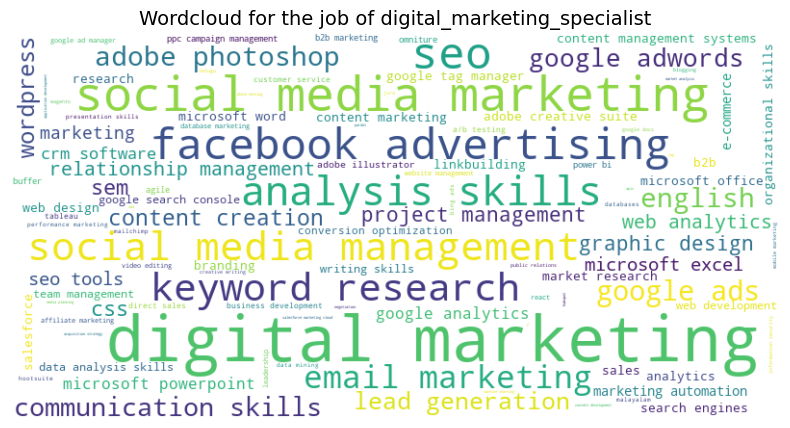

In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(skill_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f"Wordcloud for the job of {job}", fontsize=14)  
plt.axis("off")
plt.show()


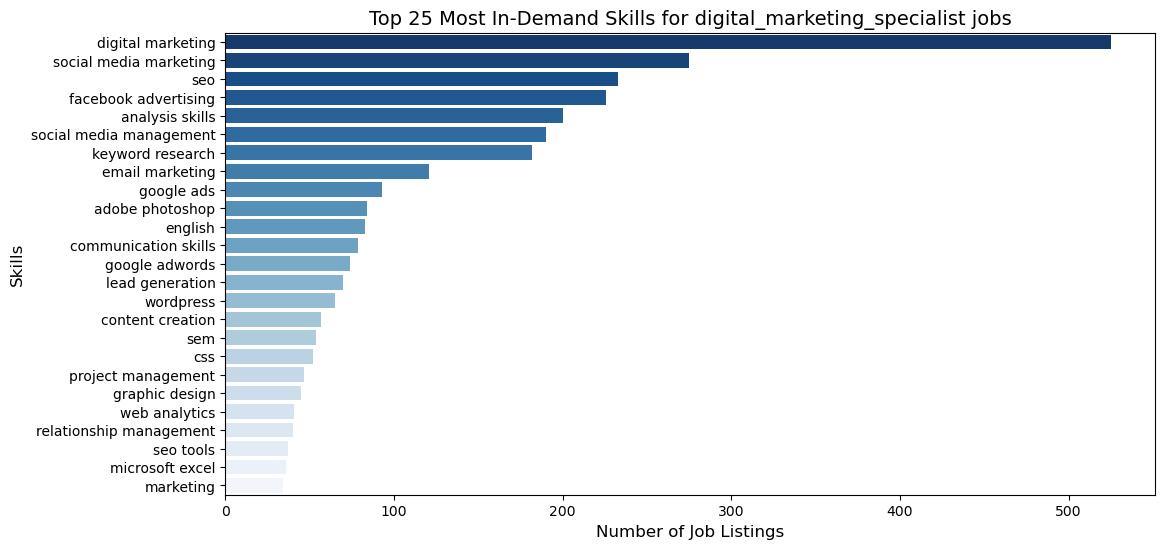

In [77]:
top_skills = skill_df.head(25)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills['Count'], y=top_skills['Skill'], palette="Blues_r")

plt.title(f"Top 25 Most In-Demand Skills for {job} jobs", fontsize=14)
plt.xlabel("Number of Job Listings", fontsize=12)
plt.ylabel("Skills", fontsize=12)
plt.show()


### Company vs Salary

In [79]:
top_companies = df.groupby('company_name')['salary_lpa'].mean().reset_index()


top_companies = top_companies.sort_values(by='salary_lpa', ascending=False)


print(top_companies.head(10))


                          company_name  salary_lpa
403  Mangalam Information Technologies        48.0
233                 Exela Technologies        48.0
166                       Cummins Inc.        48.0
57             Applligent Technologies        48.0
54             Apeiron Global Pvt. Ltd        48.0
81                                 BBS        48.0
44                           Akra Tech        48.0
184                            Diginfo        48.0
626                     Skymap Global.        48.0
327        Infovenz Software Solutions        48.0


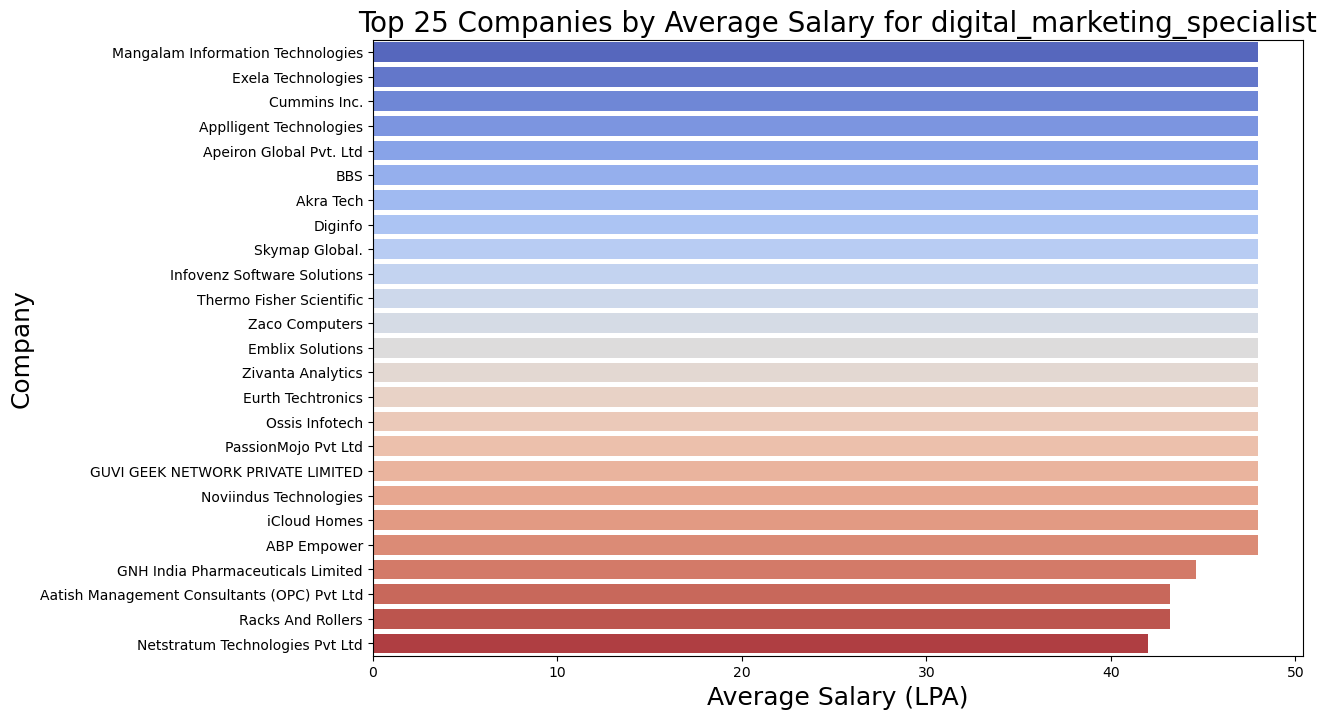

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt


top_10 = top_companies.head(25)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10['salary_lpa'], y=top_10['company_name'], palette="coolwarm")

plt.title(f"Top 25 Companies by Average Salary for {job}", fontsize=20)
plt.xlabel("Average Salary (LPA)", fontsize=18)
plt.ylabel("Company", fontsize=18)
plt.show()


### Location Vs Salary

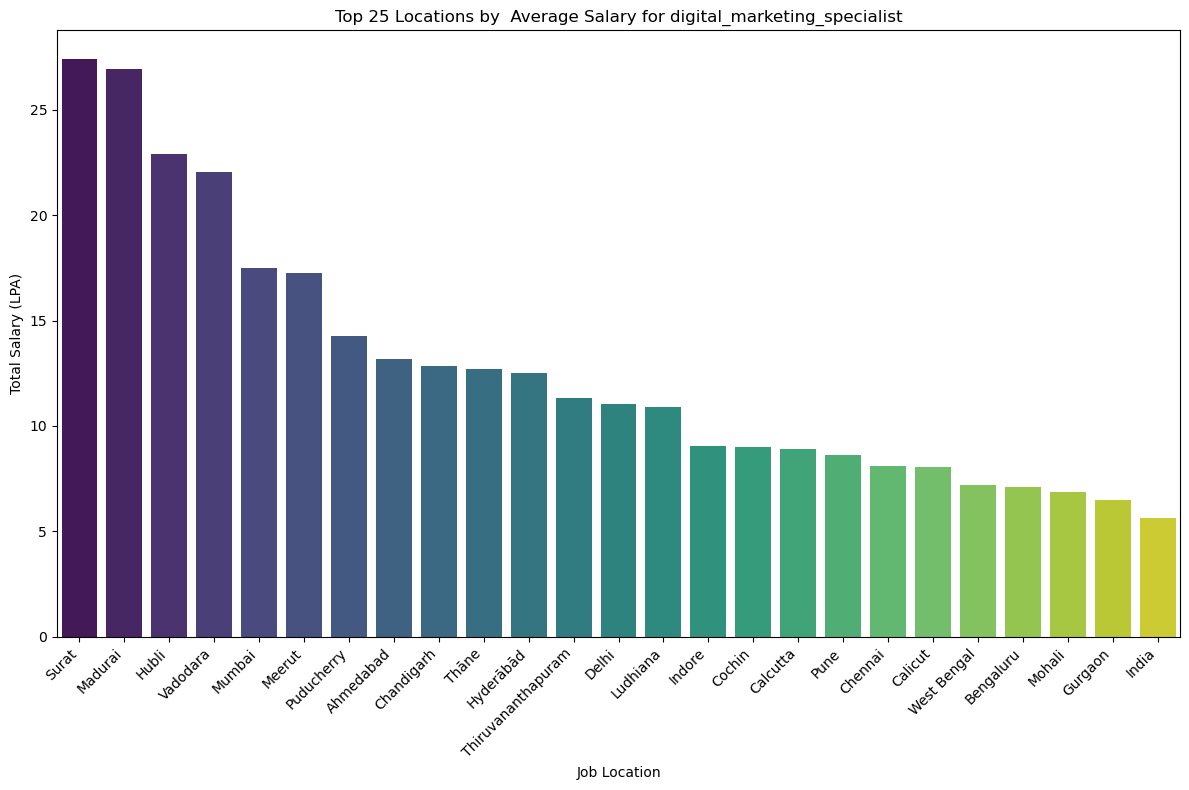

In [82]:
salary_by_location = df.groupby('job_location')['salary_lpa'].mean()


top_locations = salary_by_location.sort_values(ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


plt.xlabel('Job Location')
plt.ylabel('Total Salary (LPA)')
plt.title(f'Top 25 Locations by  Average Salary for {job}')

plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

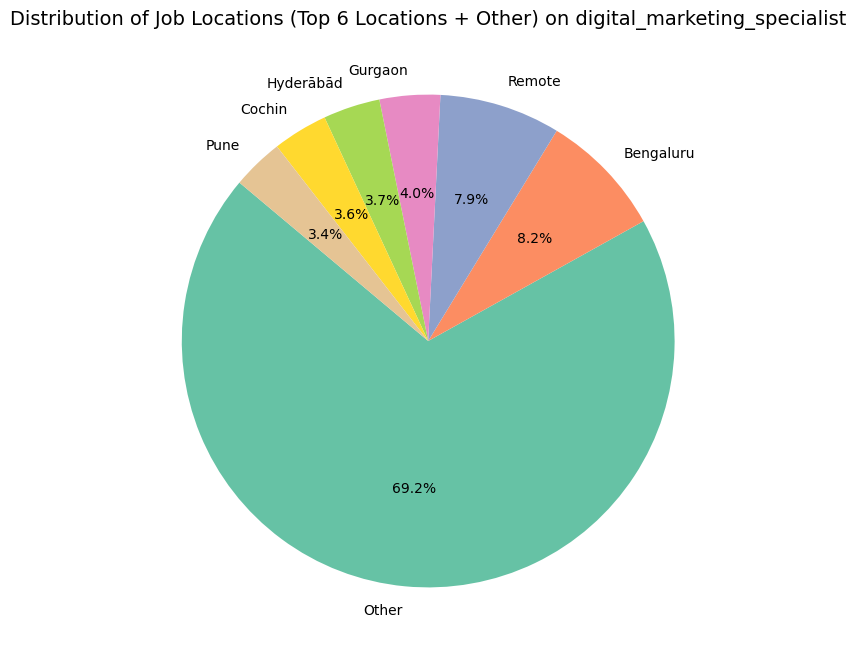

In [83]:
# Calculate the frequency of each location, excluding 'India'
location_counts = df[df['job_location'] != 'India']['job_location'].value_counts()

# Get the top 6 most frequent locations
top_locations = location_counts.head(6).index

# Group 'India' and other locations as 'Other'
df['job_location_grouped'] = df['job_location'].apply(lambda x: x if x in top_locations else 'Other')

# Calculate the frequency of the grouped locations
location_grouped_counts = df['job_location_grouped'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(location_grouped_counts, labels=location_grouped_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(location_grouped_counts)))

# Set the title
plt.title(f"Distribution of Job Locations (Top 6 Locations + Other) on {job}", fontsize=14)

# Show the pie chart
plt.show()

### Role vs Salary

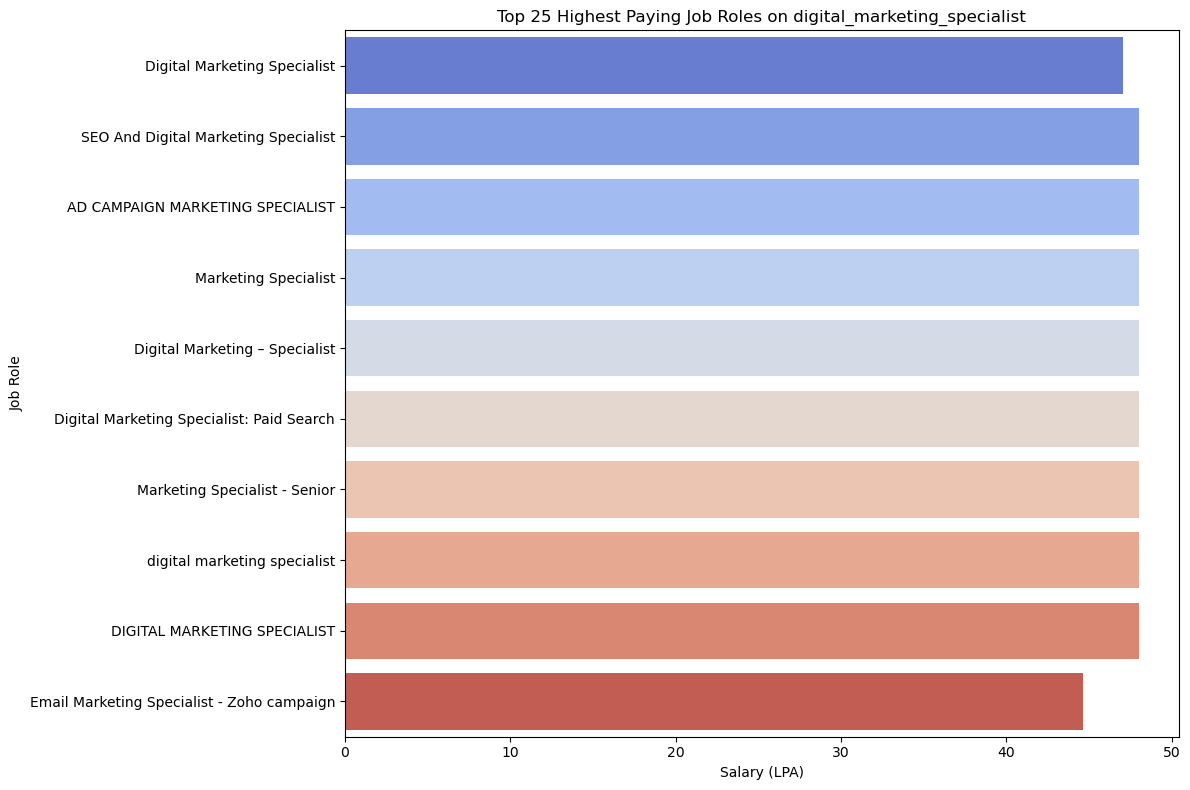

In [85]:
top_roles_by_salary = df[['job_role', 'salary_lpa']].sort_values(by='salary_lpa', ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x='salary_lpa', y='job_role', data=top_roles_by_salary, palette='coolwarm',errorbar=None)


plt.xlabel('Salary (LPA)')
plt.ylabel('Job Role')
plt.title(f'Top 25 Highest Paying Job Roles on {job}')


plt.tight_layout()
plt.show()

### Skills VS Salary

In [87]:
df_skills=df.explode("skills")
# Calculate the frequency of each skill
skill_counts = df_skills['skills'].value_counts()

# Get the top 10 most frequent skills
top_skills = skill_counts.head(10).index

# Filter the DataFrame to keep only rows with the top 10 skills
df_top_skills = df_skills[df_skills['skills'].isin(top_skills)]


C:\Users\Asus\AppData\Local\Temp\ipykernel_23512\2309435469.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


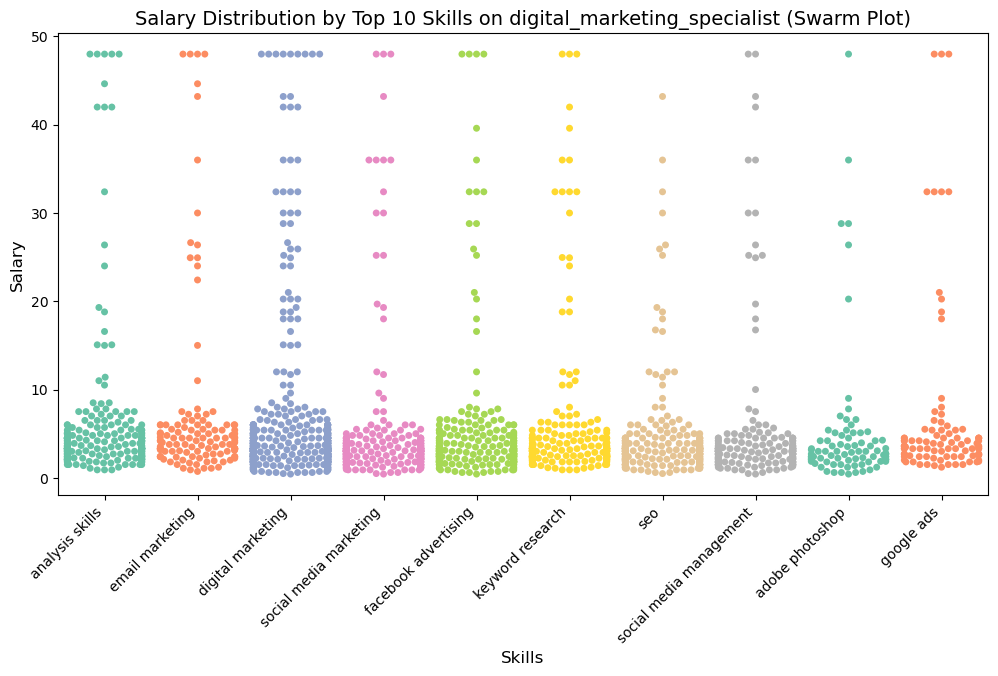

In [88]:
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.use_inf_as_na = True
plt.figure(figsize=(12, 6))
# sns.swarmplot(x='skills', y='salary_pa', data=df_top_skills, palette="Set2")
sns.swarmplot(x='skills', y='salary_lpa', data=df_top_skills,palette="Set2",hue="skills",legend=False)

plt.title(f"Salary Distribution by Top 10 Skills on {job} (Swarm Plot)", fontsize=14)
plt.xlabel("Skills", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

### Rating vs Salary

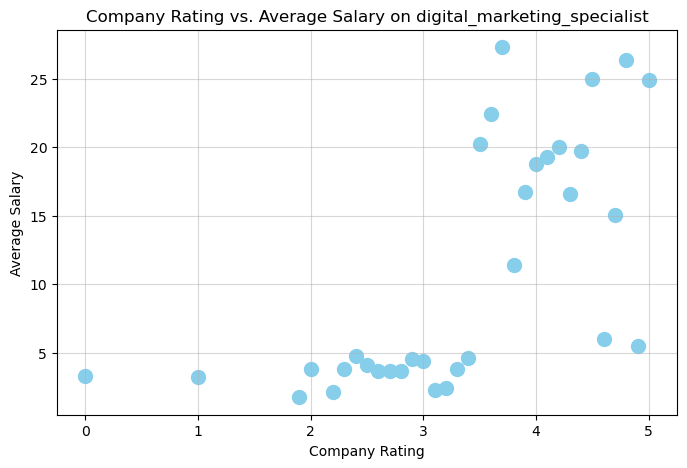

In [90]:
rating_avg_salary = df.groupby('company_rating')['salary_lpa'].mean()
# Step 1a: Map the. average salary to a diction
plt.figure(figsize=(8, 5))
plt.scatter(rating_avg_salary.index, rating_avg_salary.values, color='skyblue', s=100)
plt.title(f'Company Rating vs. Average Salary on {job}')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.grid(alpha=0.5)
plt.show()


In [91]:
df_filtered = df[df['company_rating'] != 0]
correlation = df_filtered['company_rating'].corr(df_filtered['salary_lpa'])
correlation

0.34138326705180627